# 캣팡 상품 데이터 살펴보기

캣팡에서 가져온 상품 데이터를 간단히 살펴봅니다.

캣팡: <http://www.catpang.com/>

In [1]:
# 혹시 스크랩을 안 했다면 아래 주석을 열어서 실행하세요.
# 처음에만 한번 실행하시고 자주 실행하지 마세요. 캣팡이 아파합니다.
# 반복해서 실행할 경우 CSV 파일에 데이터가 계속 추가돼서 올바르지 않게 되니 주의하세요.

# ! python scrap_catpang.py

In [2]:
# Pandas 사용

import pandas as pd

pd.__version__

'0.24.2'

In [3]:
# Matplotlib 사용

import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.1'

In [4]:
# matplotlib에 “AppleGothc”(Mac) 또는 “Malgun Gothic”(Windows) 글꼴 적용

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

## CSV 파일 로딩

In [5]:
# 스크랩한 상품 데이터를 불러옵니다.

df = pd.read_csv('output/products.csv')

df.head()

,url,name,price,image
0,http://www.catpang.com/shop/goods/goods_view.p...,어게인스트 더 그레인 새우&참치&연어 캔 80g,"2,000원",http://img.catpang.com/catpang/data/goods/4/32...
1,http://www.catpang.com/shop/goods/goods_view.p...,비타크래프트 리퀴드 스낵 치킨&타우린 15g 6개입,"4,000원",http://img.catpang.com/catpang/data/goods/5/43...
2,http://www.catpang.com/shop/goods/goods_view.p...,어게인스트 더 그레인 80g 3종 콤보 24개,"48,000원",http://img.catpang.com/catpang/data/view/6/C00...
3,http://www.catpang.com/shop/goods/goods_view.p...,어게인스트 더 그레인 참치&망고&오리 캔 100g,"3,000원",http://img.catpang.com/catpang/data/goods/4/32...
4,http://www.catpang.com/shop/goods/goods_view.p...,어게인스트 더 그레인 100g 4종 콤보 12개,"36,000원",http://img.catpang.com/catpang/data/view/6/C00...


## 이미지 표시

In [6]:
# 자주 쓰지는 않겠지만, 이미지 표시는 다음과 같이 합니다.

from IPython.display import Image, display

display(Image(url=df['image'][0], width=100))

In [7]:
# 이미지 여러 개 표시

for image in df['image'][:10]:
    display(Image(url=image, width=100))

## 알면 좋은 흑마법

흑마법으로 list comprehension과 unpack argument list를 써보겠습니다.

- <https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions>
- <https://docs.python.org/3.8/tutorial/controlflow.html#unpacking-argument-lists>

In [8]:
# list comprehension
images = [Image(url=image, width=100) for image in df['image'][:10]]

# unpack argument list
display(*images)

## 가격 처리

가격 정보에 “원” 같은 화폐 단위가 붙거나 쉼표(,)로 자릿수를 표기하는 경우가 많습니다.

이런 걸 전처리해서 숫자로 만들면 다양한 계산에 활용할 수 있습니다.

In [9]:
# 가격을 숫자로 변환

df['price'] = df['price'].str.replace('원', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(int)

df.head()

,url,name,price,image
0,http://www.catpang.com/shop/goods/goods_view.p...,어게인스트 더 그레인 새우&참치&연어 캔 80g,2000,http://img.catpang.com/catpang/data/goods/4/32...
1,http://www.catpang.com/shop/goods/goods_view.p...,비타크래프트 리퀴드 스낵 치킨&타우린 15g 6개입,4000,http://img.catpang.com/catpang/data/goods/5/43...
2,http://www.catpang.com/shop/goods/goods_view.p...,어게인스트 더 그레인 80g 3종 콤보 24개,48000,http://img.catpang.com/catpang/data/view/6/C00...
3,http://www.catpang.com/shop/goods/goods_view.p...,어게인스트 더 그레인 참치&망고&오리 캔 100g,3000,http://img.catpang.com/catpang/data/goods/4/32...
4,http://www.catpang.com/shop/goods/goods_view.p...,어게인스트 더 그레인 100g 4종 콤보 12개,36000,http://img.catpang.com/catpang/data/view/6/C00...


## 상품 가격대 확인

In [10]:
# 가격별 상품 갯수 확인

price_counts = df['price'].value_counts()

pd.DataFrame(price_counts)

,price
1500,23
3000,22
2000,14
4000,13
36000,11
4500,9
2500,9
2200,8
4800,8
5800,7


In [11]:
# value_counts 결과를 깔끔하게 보고 싶다면 다음의 두 단계를 실행해 보세요.

price_df = pd.DataFrame(price_counts)

# 1단계: 일단 index를 컬럼으로 분리합니다.
price_df = price_df.reset_index()

price_df

,index,price
0,1500,23
1,3000,22
2,2000,14
3,4000,13
4,36000,11
5,4500,9
6,2500,9
7,2200,8
8,4800,8
9,5800,7


In [12]:
# 2단계: 컬럼 이름 재조정

price_df.columns = ['price', 'count']

price_df

,price,count
0,1500,23
1,3000,22
2,2000,14
3,4000,13
4,36000,11
5,4500,9
6,2500,9
7,2200,8
8,4800,8
9,5800,7


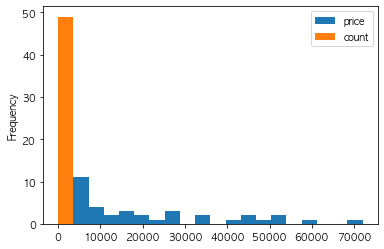

In [13]:
price_df.plot.hist(bins=20)

plt.show()

## 단어 갯수 세기

In [14]:
# 모든 이름을 공백 단위로 분리하고 모아줍니다.
# 즉, 단어의 리스트를 만들게 됩니다.

words = df['name'].apply(str.split).sum()

print(words)

['어게인스트', '더', '그레인', '새우&참치&연어', '캔', '80g', '비타크래프트', '리퀴드', '스낵', '치킨&타우린', '15g', '6개입', '어게인스트', '더', '그레인', '80g', '3종', '콤보', '24개', '어게인스트', '더', '그레인', '참치&망고&오리', '캔', '100g', '어게인스트', '더', '그레인', '100g', '4종', '콤보', '12개', '미유믹스', '버라이어티팩', '치킨&참치&새우', '캔', '78g', '12개입', '퓨리나', '팬시피스트', '치킨', '캔', '85g', '어게인스트', '더', '그레인', '참치&토스카노&연어', '캔', '100g', '지위픽', '캣', '고등어&양고기', '캔', '85g', '닥터할리', '펫밀크', '홍삼', '200ml', '퓨리나', '팬시피스트', '딜라이츠', '흰살생선&체다치즈', '캔', '85g', '퓨리나', '팬시피스트', '그릴', '치킨', '캔', '85g', '퓨리나', '팬시피스트', '딜라이츠', '캔', '3종', '콤보', '24개', '퓨리나', '팬시피스트', '칠면조', '캔', '85g', '웰니스', '코어', '그레인프리', '디바인', '듀오', '닭고기와', '오리', '캔', '79g', 'K9', '내추럴', '캣', '캔', '양고기&연어', '85g', '퓨리나', '팬시피스트', '메들리', '플로랜틴', '치킨', '캔', '85g', '미유믹스', '리얼', '치킨&비프', '캔', '78g', '로투스', '그레인프리', '저스트', '쥬시', '돼지', '캔', '70g', '퓨리나', '팬시피스트', '그릴', '연어', '캔', '85g', '웰니스', '코어', '인도어', '캔', '156g', '사조', '옵티원', '부스트', '닭안심&치즈', '캔', '160g', '지위픽', '캣', '닭고기', '캔', '85g', '베이비', '캣', '스내피톰'

In [15]:
# 단어 등장 횟수를 Counter로 확인

from collections import Counter

print(Counter(words))

Counter({'캔': 127, '캣': 57, '85g': 55, '콤보': 44, '퓨리나': 44, '팬시피스트': 44, '그레인프리': 33, '웰니스': 21, '코어': 21, '4종': 20, '치킨': 20, '파테': 19, '로투스': 18, '12개': 17, '지위픽': 16, '내추럴발란스': 16, '78g': 15, '포뮬라': 15, '79g': 14, '메들리': 14, '스튜': 14, '연어': 13, '네이처스': 13, '버라이어티': 13, '생식본능': 13, '24개': 12, '80g': 11, '150g': 11, '칠면조': 10, '사조': 10, '시그니쳐': 10, '셀렉트': 10, '스내피톰': 9, '디바인': 8, '듀오': 8, '닭고기와': 8, '수제캔': 8, '어게인스트': 7, '더': 7, '그레인': 7, '3종': 7, '미유믹스': 7, '160g': 7, '2종': 7, '그레이비': 7, '185g': 7, '웰그롬': 7, '러브잇': 6, '레드라벨': 6, '민스컵': 6, '6종': 6, '14g': 6, '파우치': 6, '4개입': 6, '네츄럴코어': 6, '메리츄': 6, '그릴': 5, '리얼': 5, '저스트': 5, '쥬시': 5, '1+1': 5, 'LID': 5, '러버스': 5, '아이시아': 5, '흑관': 5, '주식캔': 5, '클래식': 5, '키튼': 5, '3+1': 5, 'x': 5, '3개': 5, '미우숲': 5, '40g': 5, '딜라이츠': 4, 'K9': 4, '내추럴': 4, '옵티원': 4, '부스트': 4, '베이비': 4, '400g': 4, '튜나': 4, '흰살참치와': 4, '프리마베라': 4, '참치': 4, '99g': 4, '참치와': 4, '미니': 4, '참치&가다랑어': 4, '5종': 4, '71g': 4, '참치&닭고기': 4, '9개': 4, '+': 4, '카루': 4, '170g': 4, '100

In [16]:
# 단어 등장 횟수를 Pandas로 확인

word_counts = pd.Series(words).value_counts()

word_df = pd.DataFrame(word_counts)
word_df = word_df.reset_index()
word_df.columns = ['word', 'count']

word_df

,word,count
0,캔,127
1,캣,57
2,85g,55
3,콤보,44
4,팬시피스트,44
5,퓨리나,44
6,그레인프리,33
7,코어,21
8,웰니스,21
9,4종,20


In [17]:
# 목록(rows) 기본 값
rows = []

# 상위 20개만 분석
for word in word_df['word'][:20]:
    # <주의>: 단순히 contains로 검사하기 때문에 “캔디”란 텍스트도 “캔”으로 분류됩니다.
    count = df[df['name'].str.contains(word)].size
    percentage = count / df.size * 100
    row = {
        'word': word,
        'count': count,
        'percentage': f'{percentage:.2f}%'
        # f-string을 쓸 때 콜론(:) 뒤에 자릿수를 입력할 수 있습니다.
        # “.2f”는 소수점 둘째 자리까지 표시합니다.
    }
    # 목록(rows)에 추가
    rows.append(row)

pd.DataFrame(rows, columns=['word', 'count', 'percentage'])

,word,count,percentage
0,캔,564,68.12%
1,캣,248,29.95%
2,85g,248,29.95%
3,콤보,176,21.26%
4,팬시피스트,176,21.26%
5,퓨리나,176,21.26%
6,그레인프리,132,15.94%
7,코어,108,13.04%
8,웰니스,84,10.14%
9,4종,80,9.66%


## Word Cloud 맛보기

Word Cloud는 유의미하진 않지만 그냥 재밌습니다.

<https://github.com/amueller/word_cloud>

In [18]:
! pip install wordcloud

In [19]:
# wordcloud 사용

import wordcloud
from wordcloud import WordCloud

wordcloud.__version__

'1.5.0'

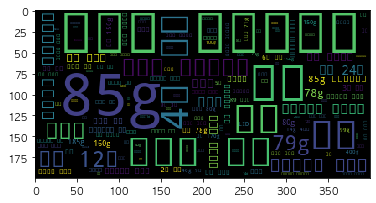

In [20]:
wordcloud = WordCloud()
wordcloud.generate(' '.join(words))

plt.imshow(wordcloud)
plt.show()

CJK가 제대로 나오게 하려면 matplotlib과 마찬가지로 글꼴 설정이 필요합니다.

참고: <https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html>

In [21]:
# 글꼴 파일 찾기

import os

font_path = ''

for font in fm.findSystemFonts():
    filename = os.path.basename(font)
    font_name = os.path.splitext(filename)[0]
    if font_name in ['AppleGothic', 'Malgun Gothic']:
        font_path = font

font_path

'/Library/Fonts/AppleGothic.ttf'

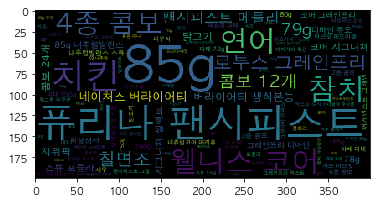

In [22]:
wordcloud = WordCloud(font_path=font_path)
wordcloud.generate(' '.join(words))

plt.imshow(wordcloud)
plt.show()

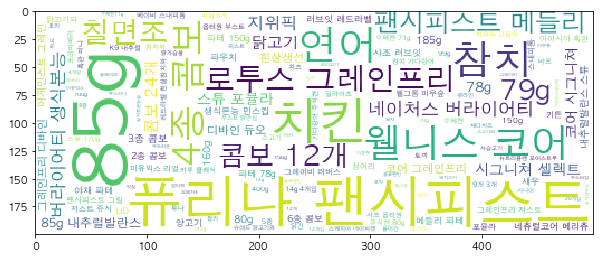

In [23]:
# 크기 및 색상 변경

wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=500,
    height=200
)
wordcloud.generate(' '.join(words))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show()

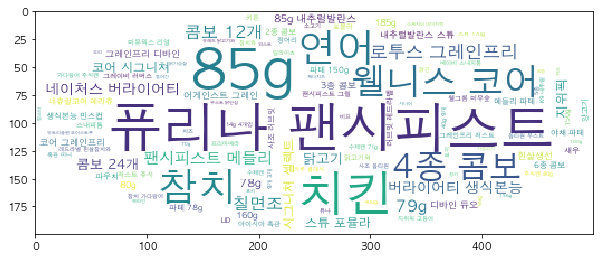

In [24]:
# 마스크 적용

import numpy as np

width, height = 500, 200

y, x = np.ogrid[:height, :width]

mask = (y - height / 2) ** 2 + (x - width / 2) ** 2 * 0.15
mask = mask > 100 ** 2
mask = mask.astype(int) * 255

wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=width,
    height=height,
    mask=mask
)
wordcloud.generate(' '.join(words))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show()